Question 12

Using solve_ivp library (adaptive RK4)

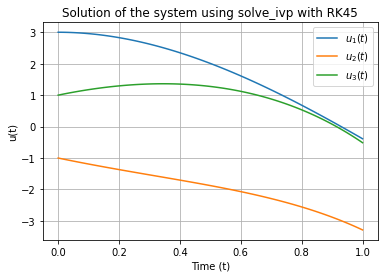

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def system(t, u):
    u1, u2, u3 = u
    return [
        u1 + 2*u2 - 2*u3 + np.exp(-t),
        u2 + u3 - 2*np.exp(-t),
        u1 + 2*u2 + np.exp(-t)
    ]


u0 = [3, -1, 1]

t_span = (0, 1)

sol = solve_ivp(system, t_span, u0, method='RK45', t_eval=np.linspace(0, 1, 100))

plt.plot(sol.t, sol.y[0], label='$u_1(t)$')
plt.plot(sol.t, sol.y[1], label='$u_2(t)$')
plt.plot(sol.t, sol.y[2], label='$u_3(t)$')
plt.title('Solution of the system using solve_ivp with RK45')
plt.xlabel('Time (t)')
plt.ylabel('u(t)')
plt.legend()
plt.grid(True)
plt.show()

RK4 to Solve ODE with more than one variable ( Using For loop)

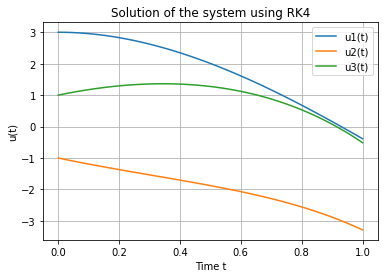

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def system(t,u):
     u1,u2,u3 = u              # u is assummed to have 3 specific values     
     return np.array([
        u1 + 2*u2 - 2*u3 + np.exp(-t),
        u2 + u3 - 2*np.exp(-t),
        u1 + 2*u2 + np.exp(-t)])
u0=np.array([3,-1,1])
t0=np.array([0,0,0])

start=0
stop=1
h=0.01


t = np.arange(start, stop+h , h)
u = np.zeros((len(t),len(u0)))     #Give an array of zeros of dimension (len(t) x len(u0))
u[0,:]=u0                          # ist row is now = u0

for i in range (1, len(t)):
    k1= h* system(t[i-1],u[i-1])      #K1 is array of dim(1 x 3(len(u)))  
    k2 = h * system(t[i-1] + h/2, u[i-1] + k1/2)
    k3 = h * system(t[i-1] + h/2, u[i-1] + k2/2)
    k4 = h * system(t[i-1] + h, u[i-1] + k3)
    
    u[i] = u[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6     # ith row of u is modified from zero initially present in u    
    
    
plt.plot(t, u[:, 0], label='u1(t)')
plt.plot(t, u[:, 1], label='u2(t)')
plt.plot(t, u[:, 2], label='u3(t)')
plt.title('Solution of the system using RK4')
plt.xlabel('Time t')
plt.ylabel('u(t)')
plt.legend()
plt.grid(True)
plt.show()